## Ironhack payments group project

### Data Quality analysis

Importing pandas and loading .csv files

In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_file = r'C:\Users\Vanuhi\Desktop\Ironhack_labs\Pink_Power_Ironhack_payments_project\project-1-ironhack-payments-2-en\project_dataset\cash request 0 data analyst.csv'
print(os.path.exists(my_file))

False


reading both csv files

In [3]:
df1 = pd.read_csv(r'C:\Users\Vanuhi\Desktop\Ironhack_labs\Pink_Power_Ironhack_payments_project\project-1-ironhack-payments-2-en\project_dataset\cash request - data analyst.csv')
df2 = pd.read_csv(r'C:\Users\Vanuhi\Desktop\Ironhack_labs\Pink_Power_Ironhack_payments_project\project-1-ironhack-payments-2-en\project_dataset\fees - data analyst - .csv')

df_cash = df1.copy()
df_fees = df2.copy()


brief tables overview

In [4]:
df_cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [5]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [6]:
round(df_cash.describe(), 2)

,id,amount,user_id,deleted_account_id
count,23970.00,23970.00,21867.00,2104.00
mean,13910.97,82.72,32581.25,9658.76
std,7788.12,26.53,27618.57,7972.74
min,3.00,1.00,34.00,91.00
25%,7427.25,50.00,10804.00,3767.00
50%,14270.50,100.00,23773.00,6121.50
75%,20607.75,100.00,46965.00,16345.00
max,27010.00,200.00,103719.00,30445.00


In [7]:
round(df_fees.describe(), 2)

,id,cash_request_id,total_amount
count,21061.00,21057.00,21061.00
mean,10645.36,16318.45,5.00
std,6099.32,6656.15,0.03
min,1.00,1456.00,5.00
25%,5385.00,11745.00,5.00
50%,10652.00,17160.00,5.00
75%,15925.00,21796.00,5.00
max,21193.00,27010.00,10.00


identifying common column

In [8]:
id_set_cash = len(set(df_cash['id']))
id_set_fee = len(set(df_fees['cash_request_id']))
print(id_set_cash == id_set_fee, '\n', id_set_cash, id_set_fee)

False 
 23970 12937


In [9]:
len(set(df_cash['id']).intersection(set(df_fees['cash_request_id'])))

12933

In [10]:
pd.isna(df_fees['id']).sum()

np.int64(0)

In [11]:
pd.isna(df_fees['cash_request_id']).sum()

np.int64(4)

adding datatime to specify cohorts later based on the month

In [12]:
from datetime import datetime

timestamp = "2020-09-07 10:47:27.42315+00"
datum = datetime.fromisoformat(timestamp)
print(datum.strftime("%B %Y"))

September 2020


creating 2 columns next to created_at one specifically for month and one specifically for year

In [13]:
df_fees.insert(df_fees.columns.get_loc('created_at') + 1, "created_at_month",0)
df_fees.insert(df_fees.columns.get_loc('created_at') + 2, "year",0)
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,created_at_month,year,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,0,0,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,0,0,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,0,0,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,0,0,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,0,0,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [14]:
def from_dt_to_mon(timestamp):
    return datetime.fromisoformat(timestamp).strftime("%B")[:3]

def from_dt_to_yr(timestamp):
    return datetime.fromisoformat(timestamp).strftime("%Y")

In [15]:
df_fees["created_at_month"] = df_fees["created_at"].apply(from_dt_to_mon)
df_fees["year"] = df_fees["created_at"].apply(from_dt_to_yr)
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,created_at_month,year,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,Sep,2020,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,Sep,2020,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,Oct,2020,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,Oct,2020,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,Oct,2020,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [16]:
print(df_fees['year'].dtype)

object


In [17]:
print(df_fees['year'].unique()) #don't need a year col since its only 1 year


['2020']


In [18]:
print(df_fees['created_at_month'].unique())

['Sep' 'Oct' 'Aug' 'Nov' 'Jul' 'Jun' 'May']


In [19]:
df_fees_final = df_fees[['cash_request_id', 'type', 'category', 'total_amount', 'created_at_month']]

In [20]:
df_fees_final.info

<bound method DataFrame.info of        cash_request_id             type               category  total_amount  \
0              14941.0  instant_payment                    NaN           5.0   
1              11714.0         incident  rejected_direct_debit           5.0   
2              23371.0  instant_payment                    NaN           5.0   
3              26772.0  instant_payment                    NaN           5.0   
4              19350.0  instant_payment                    NaN           5.0   
...                ...              ...                    ...           ...   
21056          20262.0  instant_payment                    NaN           5.0   
21057          26764.0  instant_payment                    NaN           5.0   
21058          25331.0  instant_payment                    NaN           5.0   
21059          23628.0  instant_payment                    NaN           5.0   
21060          20982.0  instant_payment                    NaN           5.0   

      c

Checking for missing values in each column

In [21]:
pd.isna(df_fees_final['cash_request_id']).sum()

np.int64(4)

In [22]:
pd.isna(df_fees_final['type']).sum()

np.int64(0)

In [23]:
pd.isna(df_fees_final['category']).sum()

np.int64(18865)

In [24]:
pd.isna(df_fees_final['total_amount']).sum()

np.int64(0)

In [25]:
pd.isna(df_fees_final['created_at_month']).sum()

np.int64(0)

final table to work with -> df_fees_final

In [26]:
num = df_fees_final.select_dtypes(include="number")
cat = df_fees_final.select_dtypes(exclude="number")

### Revenue table with grouped by month view, total revenue and relative revenue

creating the new table and grouping by month

In [27]:
df_revenue = df_fees_final[['created_at_month','total_amount']]

print(df_revenue)

      created_at_month  total_amount
0                  Sep           5.0
1                  Sep           5.0
2                  Oct           5.0
3                  Oct           5.0
4                  Oct           5.0
...                ...           ...
21056              Oct           5.0
21057              Oct           5.0
21058              Oct           5.0
21059              Oct           5.0
21060              Oct           5.0

[21061 rows x 2 columns]


In [52]:
df_revenue = df_fees_final[['created_at_month','total_amount']].copy()

df_revenue = df_revenue.groupby('created_at_month', as_index=False).sum()
print(df_revenue)


  created_at_month  total_amount
0              Aug       15260.0
1              Jul        8095.0
2              Jun        3845.0
3              May          80.0
4              Nov        1335.0
5              Oct       53835.0
6              Sep       22860.0


In [64]:
# Define the proper calendar order for months (using all months works fine)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert to a categorical with the correct order
df_revenue['created_at_month'] = pd.Categorical(df_revenue['created_at_month'], categories=month_order, ordered=True)

# Sort the DataFrame by the newly ordered categorical column
df = df_revenue.sort_values('created_at_month')
print(df)

  created_at_month  total_amount
3              May          80.0
2              Jun        3845.0
1              Jul        8095.0
0              Aug       15260.0
6              Sep       22860.0
5              Oct       53835.0
4              Nov        1335.0


C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_18944\1166997754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_revenue, x='created_at_month', y='total_amount', palette='Blues')


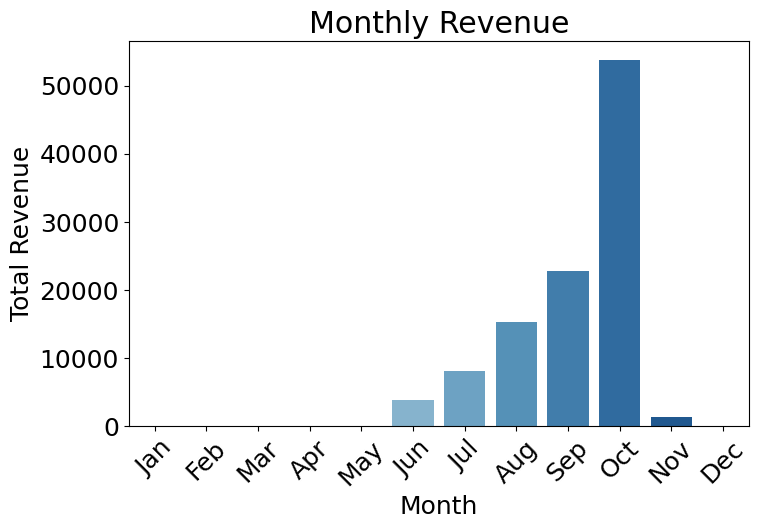

In [65]:
# Set the plot size
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(data=df_revenue, x='created_at_month', y='total_amount', palette='Blues')

plt.rcParams.update({'font.size':18})
# Add title and labels
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability


plt.savefig("../plot/monthly_revenue.jpg", bbox_inches="tight", dpi=600)
# Display the plot
plt.show()

In [55]:
plt.savefig("../plot/monthly_revenue.jpg", bbox_inches="tight", dpi=600)

<Figure size 640x480 with 0 Axes>

adding total

In [29]:
total_amount_sum = df_revenue['total_amount'].sum()
df_revenue = df_revenue.rename(columns={'total_amount': 'amount'})
df_revenue.loc['Total'] = df_revenue.sum(numeric_only=True)

print(df_revenue)

                    amount
created_at_month          
Aug                15260.0
Jul                 8095.0
Jun                 3845.0
May                   80.0
Nov                 1335.0
Oct                53835.0
Sep                22860.0
Total             105310.0


adding relatives

In [ ]:
df_revenue['relative_amount'] = round((df_revenue['amount'] / total_amount_sum) * 100,2)

#Frequency table
print(df_revenue)

                    amount  relative_amount
created_at_month                           
Aug                15260.0            14.49
Jul                 8095.0             7.69
Jun                 3845.0             3.65
May                   80.0             0.08
Nov                 1335.0             1.27
Oct                53835.0            51.12
Sep                22860.0            21.71
Total             105310.0           100.00


### Successful and failed transactions

In [34]:
df_fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'created_at_month', 'year', 'updated_at',
       'paid_at', 'from_date', 'to_date', 'charge_moment'],
      dtype='object')

In [36]:
df_status_counts = pd.crosstab(df_fees['created_at_month'], df_fees['status'])
print(df_status_counts)

status            accepted  cancelled  confirmed  rejected
created_at_month                                          
Aug                   2180        701          1       170
Jul                    804        789          0        26
Jun                    340        427          0         2
May                     12          4          0         0
Nov                    156        100          1        10
Oct                   8041       1949         75       701
Sep                   3308        968         11       285


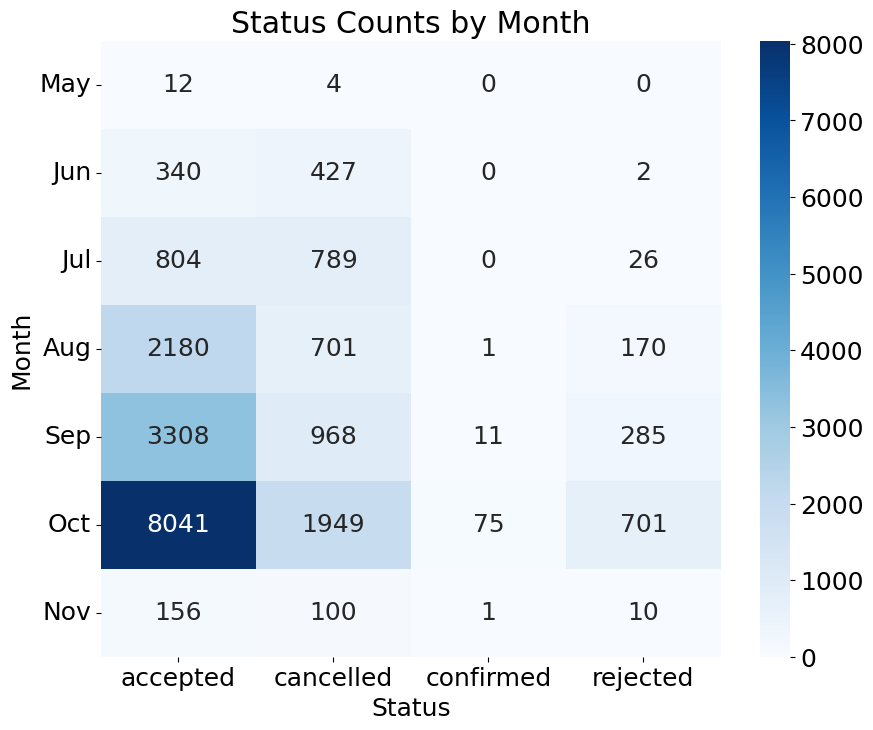

In [72]:
#heatmap

# Define the correct chronological order for the months present in your data
month_order = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

# Reindex the DataFrame to order the months chronologically
df_fees = df.reindex(month_order)

# Set global font size to 18 for all elements
plt.rcParams.update({'font.size': 18})

# Create the heatmap with the "Blues" palette and annotate the cells
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=True, fmt="d", cmap="Blues", annot_kws={'size': 18})

# Set the title and labels
plt.title("Status Counts by Month")
plt.xlabel("Status")
plt.ylabel("Month")

# Ensure the y-axis (month names) are displayed horizontally
plt.yticks(rotation=0)


plt.savefig("../plot/overall_status_distribution_heatmap.jpg", bbox_inches="tight", dpi=600)
# Display the heatmap
plt.show()


### Merged table(cash and fees combined)

In [40]:
merged_df = pd.merge(df_cash, df_fees, left_on='id', right_on='cash_request_id', how='outer')
merged_df.head(10)

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,total_amount,reason,created_at_y,created_at_month,year,updated_at_y,paid_at,from_date,to_date,charge_moment
0,3.0,1.0,canceled,2019-11-19 13:57:53.511561+00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,100.0,money_back,2019-12-09 14:47:35.190714+00,2020-11-04 12:54:52.120014+00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9.0,100.0,money_back,2019-12-10 19:14:41.668754+00,2020-11-04 12:55:30.918436+00,430.0,2019-12-11 09:50:51+00,NaN,2020-01-08 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10.0,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11.0,100.0,money_back,2019-12-10 19:18:35.805897+00,2020-11-04 12:55:36.25624+00,735.0,2019-12-11 16:53:50.943562+00,NaN,2019-12-30 23:00:00+00,2019-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13.0,100.0,direct_debit_rejected,2019-12-10 19:18:59.309847+00,2020-11-04 12:55:22.528038+00,406.0,2019-12-11 16:56:12.640514+00,NaN,2020-02-05 23:00:00+00,2019-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,28.0,100.0,money_back,2019-12-10 19:22:09.572973+00,2020-11-04 12:55:30.858159+00,140.0,2019-12-11 09:59:38.31956+00,NaN,2020-01-08 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Completion of transactional requests

In [42]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,created_at_month,year,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,Sep,2020,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,Sep,2020,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,Oct,2020,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,Oct,2020,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,Oct,2020,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [ ]:
# 0 null values
df_fees['created_at'].isna().sum()
df_fees['charge_moment'].isna().sum()
df_fees['total_amount'].isna().sum()


np.int64(0)

In [44]:
df_fees['from_date'].isna().sum()

np.int64(13295)

In [49]:
df_fees['created_at'].count()

np.int64(21061)

In [46]:
df_fees['paid_at'].isna().sum()

np.int64(5530)

In [70]:
df_fees['total_amount'].isna().sum()

np.int64(0)